In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/dataset/test/alligator/alligator_25.jpeg
/kaggle/input/dataset/dataset/test/alligator/alligator_11.jpeg
/kaggle/input/dataset/dataset/test/alligator/alligator_5.jpeg
/kaggle/input/dataset/dataset/test/alligator/alligator_3.jpeg
/kaggle/input/dataset/dataset/test/alligator/alligator_40.jpeg
/kaggle/input/dataset/dataset/test/alligator/alligator_36.jpeg
/kaggle/input/dataset/dataset/test/alligator/alligator_22.jpeg
/kaggle/input/dataset/dataset/test/alligator/alligator_46.jpeg
/kaggle/input/dataset/dataset/test/alligator/alligator_99.jpeg
/kaggle/input/dataset/dataset/test/alligator/alligator_17.jpeg
/kaggle/input/dataset/dataset/test/alligator/alligator_49.jpeg
/kaggle/input/dataset/dataset/test/alligator/alligator_50.jpeg
/kaggle/input/dataset/dataset/test/alligator/alligator_64.jpeg
/kaggle/input/dataset/dataset/test/alligator/alligator_33.jpeg
/kaggle/input/dataset/dataset/test/alligator/alligator_1.jpeg
/kaggle/input/dataset/dataset/test/alligator/alligator_82.

In [20]:
%matplotlib inline

In [21]:
import torch
import torchvision
import torchvision.transforms as transforms
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assume that we are on a CUDA machine, then this should print a CUDA device:

print(device)

cuda:0


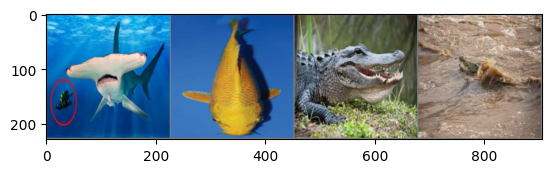

shark koi   alligator alligator


In [22]:
transform = transforms.Compose([
    transforms.Lambda(lambda x: x.convert('RGB') if x.mode != 'RGB' else x),
    transforms.Resize((224, 224)),  # Thay đổi kích thước hình ảnh
    transforms.ToTensor(),  # Chuyển đổi PIL Image sang Tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Chuẩn hóa
])


# Tải dữ liệu từ thư mục của bạn
trainset = torchvision.datasets.ImageFolder(root='/kaggle/input/dataset/dataset/train', transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.ImageFolder(root='/kaggle/input/dataset/dataset/test', transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

# Định nghĩa các lớp trong bộ dữ liệu của bạn
classes = ('alligator', 'koi', 'shark')
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# Định nghĩa các lớp tương ứng trong bộ dữ liệu mới
classes = ('alligator', 'koi', 'shark')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # chuyển từ (C, H, W) sang (H, W, C)
    plt.show()

# Lấy một số hình ảnh ngẫu nhiên từ tập dữ liệu huấn luyện
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Hiển thị hình ảnh
imshow(torchvision.utils.make_grid(images))

# In nhãn tương ứng
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(len(labels))))  # Sửa đổi để phù hợp với số lượng hình ảnh thực tế trong một batch

In [23]:
!pip install torchsummary

In [24]:
# -*- coding: utf-8 -*-

import torch.nn as nn
import torch.nn.functional as F
import torch

class Net(nn.Module):
    def __init__(self,nclass=3):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 7, padding = 3, stride = 1)

        self.conv2_1 = nn.Conv2d(32, 64, 3, padding = 1, stride = 1)
        self.conv2_2 = nn.Conv2d(32, 64, 3, padding = 1, stride = 2)
        
        self.conv2_2_1 = nn.Conv2d(64, 128, 3, padding = 1, stride = 1)
        self.conv2_2_2 = nn.Conv2d(64, 128, 3, padding = 1, stride = 1)

        self.avg = nn.AvgPool2d(2)

        self.conv3_1 = nn.Conv2d(64, 128, 3, padding = 1, stride = 1)
        self.conv3_2 = nn.Conv2d(64, 128, 3, padding = 1, stride = 1)

        self.conv4 = nn.Conv2d(384, 448, 3, padding = 1, stride = 2)
        self.maxpool=nn.MaxPool2d(2)

        self.conv5 = nn.Conv2d(384, 448, 3, padding = 1, stride = 1)

        self.conv6 = nn.Conv2d(448, 512, 3, padding = 1, stride = 2)

        self.conv7 = nn.Conv2d(512, 1024, 3, padding = 1, stride = 2)

        self.avg1 = nn.AvgPool2d(14)

        self.fc1 = nn.Linear(1024*1*1, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, nclass)

#OutputImage = ((ImageSize + 2*Padding) - KernalSize) / Stride) + 1

    def forward(self, x):
        x = F.relu(self.conv1(x))
        
        x2_1 = F.relu(self.conv2_1(x))
        x2_2 = F.relu(self.conv2_2(x))

        x2_2_1 = F.relu(self.conv2_2_1(x2_2))
        x2_2_2 = F.relu(self.conv2_2_2(x2_2))

        x3 = self.avg(x2_1)

        x3_1 = F.relu(self.conv3_1(x3))
        x3_2 = F.relu(self.conv3_2(x3))

        x4 = F.relu(x2_2_1+x3_1)
        x5 = torch.cat((x2_2_2, x3_2), dim=1)

        x6 = torch.cat((x4, x5), dim=1)       
        
        x6_1 = F.relu(self.conv4(x6))
        x6_2 = self.maxpool(x6)

        x7= F.relu(self.conv5(x6_2))

        x8 = F.relu(x7+x6_1)

        x9= F.relu(self.conv6(x8))
        x10= F.relu(self.conv7(x9))

        x11 = self.avg1(x10)

        x11 = x11.view(-1, 1024*1*1)
      
        x11 = (self.fc1(x11))
        x11 = (self.fc2(x11))
        x11 = self.fc3(x11)

        return x11
        
net = Net()
net = net.to(device)
from torchsummary import summary
summary(net,(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]           4,736
            Conv2d-2         [-1, 64, 224, 224]          18,496
            Conv2d-3         [-1, 64, 112, 112]          18,496
            Conv2d-4        [-1, 128, 112, 112]          73,856
            Conv2d-5        [-1, 128, 112, 112]          73,856
         AvgPool2d-6         [-1, 64, 112, 112]               0
            Conv2d-7        [-1, 128, 112, 112]          73,856
            Conv2d-8        [-1, 128, 112, 112]          73,856
            Conv2d-9          [-1, 448, 56, 56]       1,548,736
        MaxPool2d-10          [-1, 384, 56, 56]               0
           Conv2d-11          [-1, 448, 56, 56]       1,548,736
           Conv2d-12          [-1, 512, 28, 28]       2,064,896
           Conv2d-13         [-1, 1024, 14, 14]       4,719,616
        AvgPool2d-14           [-1, 102

In [25]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [26]:
import warnings

# Bỏ qua cảnh báo cụ thể về hình ảnh có độ trong suốt
warnings.filterwarnings("ignore", message="Palette images with Transparency expressed in bytes should be converted to RGBA images")

In [27]:
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:   
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 50))
            running_loss = 0.0

print('Finished Training')

[1,    50] loss: 1.098
[1,   100] loss: 1.099
[1,   150] loss: 1.099
[1,   200] loss: 1.095
[1,   250] loss: 1.098
[1,   300] loss: 1.098
[1,   350] loss: 1.094
[1,   400] loss: 1.089
[1,   450] loss: 1.086
[1,   500] loss: 1.060
[1,   550] loss: 0.943
[1,   600] loss: 0.874
[1,   650] loss: 0.773
[1,   700] loss: 0.664
[2,    50] loss: 0.698
[2,   100] loss: 0.664
[2,   150] loss: 0.548
[2,   200] loss: 0.572
[2,   250] loss: 0.618
[2,   300] loss: 0.545
[2,   350] loss: 0.483
[2,   400] loss: 0.683
[2,   450] loss: 0.639
[2,   500] loss: 0.616
[2,   550] loss: 0.542
[2,   600] loss: 0.502
[2,   650] loss: 0.546
[2,   700] loss: 0.657
[3,    50] loss: 0.471
[3,   100] loss: 0.590
[3,   150] loss: 0.548
[3,   200] loss: 0.450
[3,   250] loss: 0.511
[3,   300] loss: 0.500
[3,   350] loss: 0.602
[3,   400] loss: 0.582
[3,   450] loss: 0.484
[3,   500] loss: 0.542
[3,   550] loss: 0.404
[3,   600] loss: 0.552
[3,   650] loss: 0.527
[3,   700] loss: 0.467
[4,    50] loss: 0.483
[4,   100] 

In [28]:
pip install ptflops

Note: you may need to restart the kernel to use updated packages.


In [29]:
import torch
from ptflops import get_model_complexity_info
from torchsummary import summary
# from models.mymodel import *

with torch.cuda.device(0):
  model = Net()
  #macs, params = get_model_complexity_info(model, (3, 32, 32), as_strings=True,
  macs, params = get_model_complexity_info(model, (3, 224, 224), as_strings=True,
                                           print_per_layer_stat=True, verbose=True,
                                           #flops_units='MMac')
                                           flops_units='GMac')
  print('{:<30}  {:<8}'.format('Computational complexity (MACs): ', macs))
  macs1 = macs.split()
  strmacs1=str(float(macs1[0])/2) + ' ' + macs1[1][0]
  print('{:<30}  {:<8}'.format('Floating-point operations (FLOPs): ', strmacs1))
  print('{:<30}  {:<8}'.format('Number of parameters: ', params))
  
  print('Number of model parameters (referred)): {}'.format(
      sum([p.data.nelement() for p in model.parameters()])))
#   # summary(model, (3, 224, 224))

Net(
  10.88 M, 100.000% Params, 17.37 GMac, 99.847% MACs, 
  (conv1): Conv2d(4.74 k, 0.044% Params, 0.24 GMac, 1.366% MACs, 3, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (conv2_1): Conv2d(18.5 k, 0.170% Params, 0.93 GMac, 5.335% MACs, 32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_2): Conv2d(18.5 k, 0.170% Params, 0.23 GMac, 1.334% MACs, 32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2_2_1): Conv2d(73.86 k, 0.679% Params, 0.93 GMac, 5.325% MACs, 64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_2_2): Conv2d(73.86 k, 0.679% Params, 0.93 GMac, 5.325% MACs, 64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (avg): AvgPool2d(0, 0.000% Params, 0.0 GMac, 0.018% MACs, kernel_size=2, stride=2, padding=0)
  (conv3_1): Conv2d(73.86 k, 0.679% Params, 0.93 GMac, 5.325% MACs, 64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_2): Conv2d(73.86 k, 0.679% Params, 0.93 GMac, 5.325% MACs, 64, 128, kern

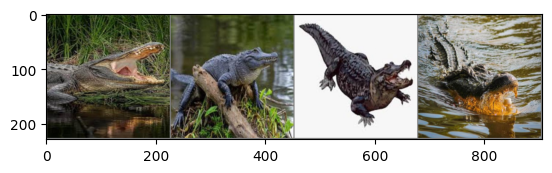

GroundTruth:  alligator alligator alligator alligator


In [30]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [31]:
outputs = net(images.to(device))

In [32]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  alligator alligator alligator alligator


In [33]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 96 %


In [34]:
class_correct = list(0. for i in range(3))
class_total = list(0. for i in range(3))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(3):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(3):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of alligator : 97 %
Accuracy of   koi : 96 %
Accuracy of shark : 92 %


In [35]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assume that we are on a CUDA machine, then this should print a CUDA device:

print(device)

cuda:0
